In [14]:

import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras, lite
from tensorflow.keras.layers import Dense, Dropout, Flatten, ConvLSTM2D, LSTM, RepeatVector
import keras_tuner as kt



ImportError: cannot import name 'Dense' from 'tensorflow.keras' (C:\Users\sirui\AppData\Roaming\Python\Python39\site-packages\keras\api\_v2\keras\__init__.py)

In [2]:
df_train=pd.read_csv('train_motion_data.csv')
df_test=pd.read_csv('test_motion_data.csv')
df_train.Class.unique()

df_train.Class=df_train.Class.replace(['AGGRESSIVE', 'NORMAL', 'SLOW'],[1,2,3])
# Global constants
FEATURES = 6
LABELS = 3
N_RECORDS = 11



# Split the samples by class
# so it can be trimmed to a desired shape
df_train_normal = df_train.loc[df_train['Class'] == 'NORMAL']
df_train_slow = df_train.loc[df_train['Class'] == 'SLOW']
df_train_aggressive = df_train.loc[df_train['Class'] == 'AGGRESSIVE']

df_test_normal = df_test.loc[df_test['Class'] == 'NORMAL']
df_test_slow = df_test.loc[df_test['Class'] == 'SLOW']
df_test_aggressive = df_test.loc[df_test['Class'] == 'AGGRESSIVE']




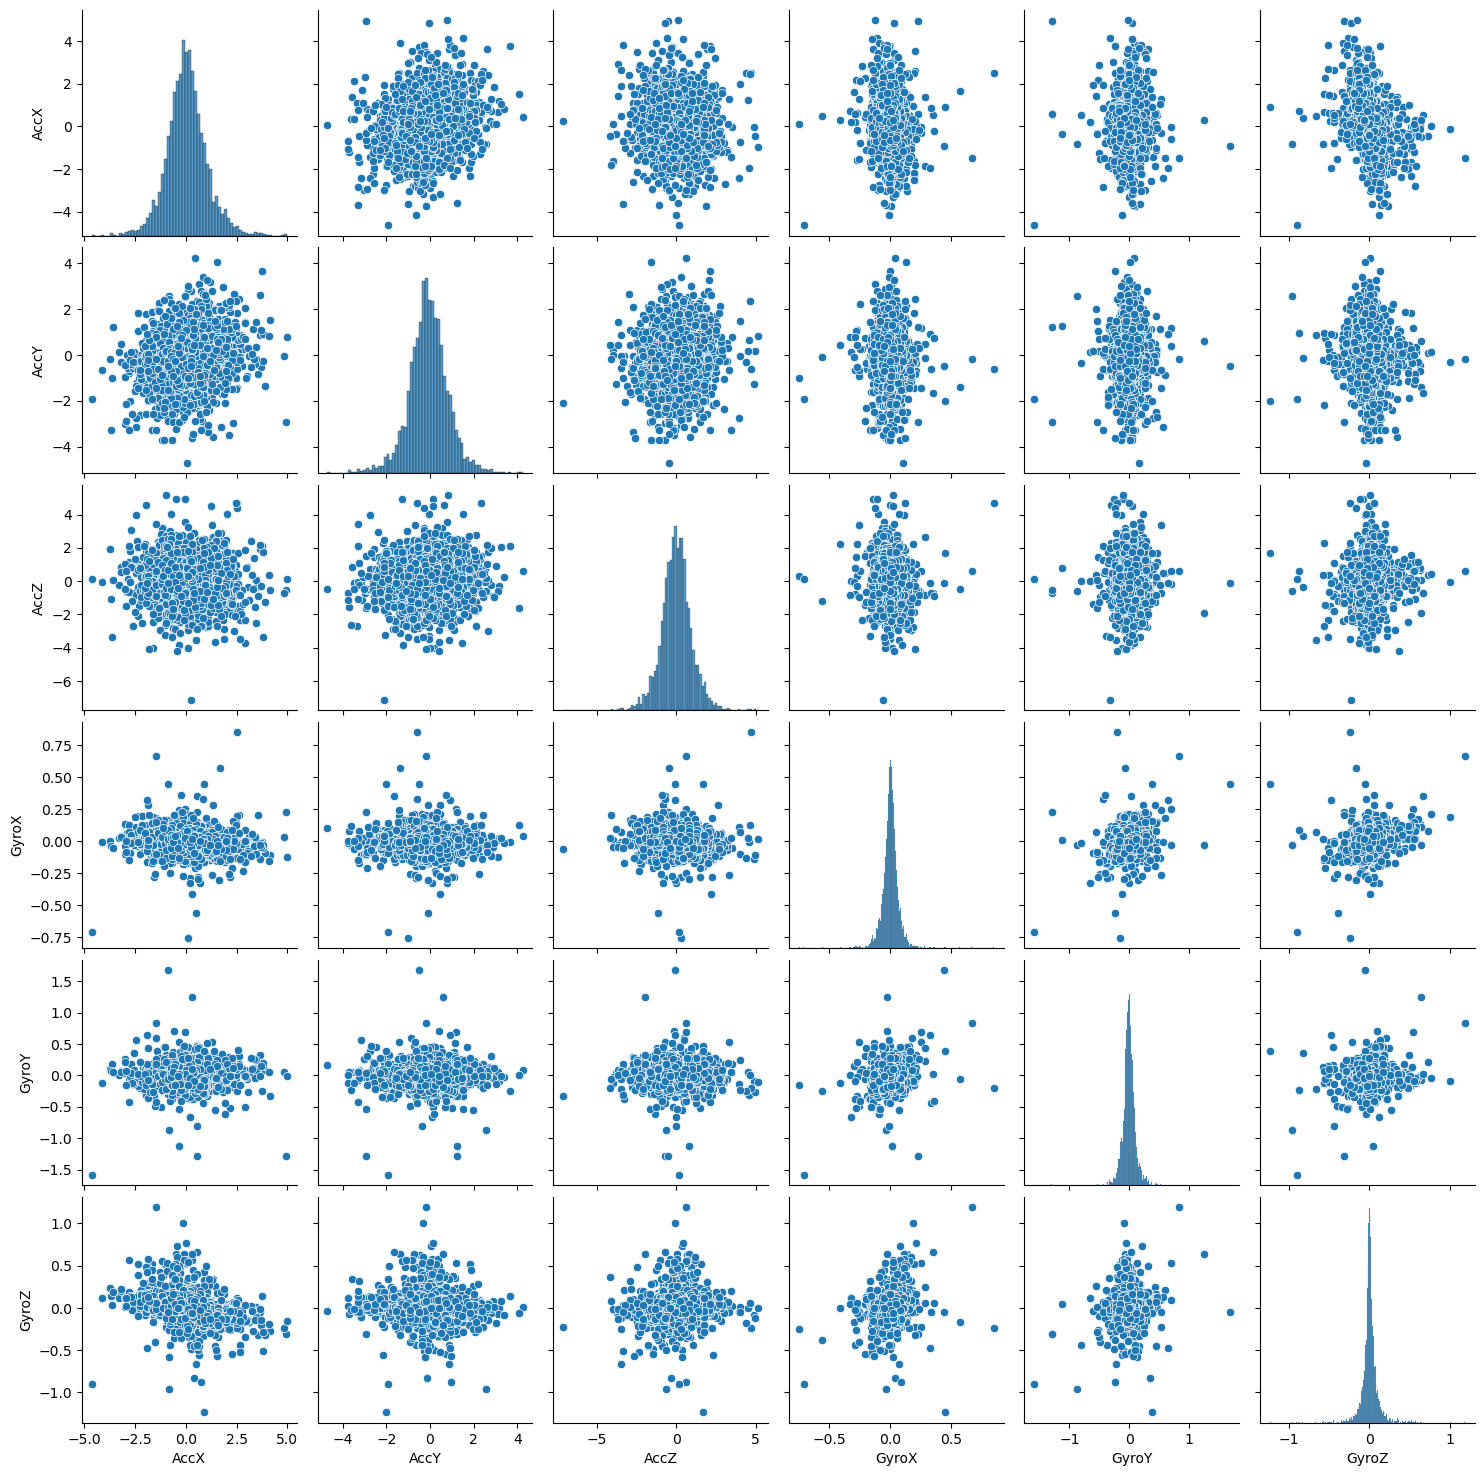

In [20]:
sns.pairplot(df_train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class']])

In [4]:
sp.stats.kurtosis(df_train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']])

array([ 1.68660838,  1.69323959,  2.73103603, 23.13189022, 29.08099787,
       18.71771673])

In [5]:
x=df_train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
y=df_train.Class
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [6]:


k=0
M=-1
for i in range (1,101):
    ModelK=KNeighborsClassifier(n_neighbors=i)
    ModelK.fit(x_train,y_train)
    S=ModelK.score(x_test,y_test)
    if S>M:
        M=S
        k=i
print(k)



ModelK=KNeighborsClassifier(n_neighbors=k)

ModelK.fit(x_train,y_train)
y_predict=ModelK.predict(x_test)


7


In [10]:
ModelK.fit(x_train,y_train)
ModelK.score(x_train,y_train) 
ModelK.score(x_test,y_test) 



0.4170096021947874

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


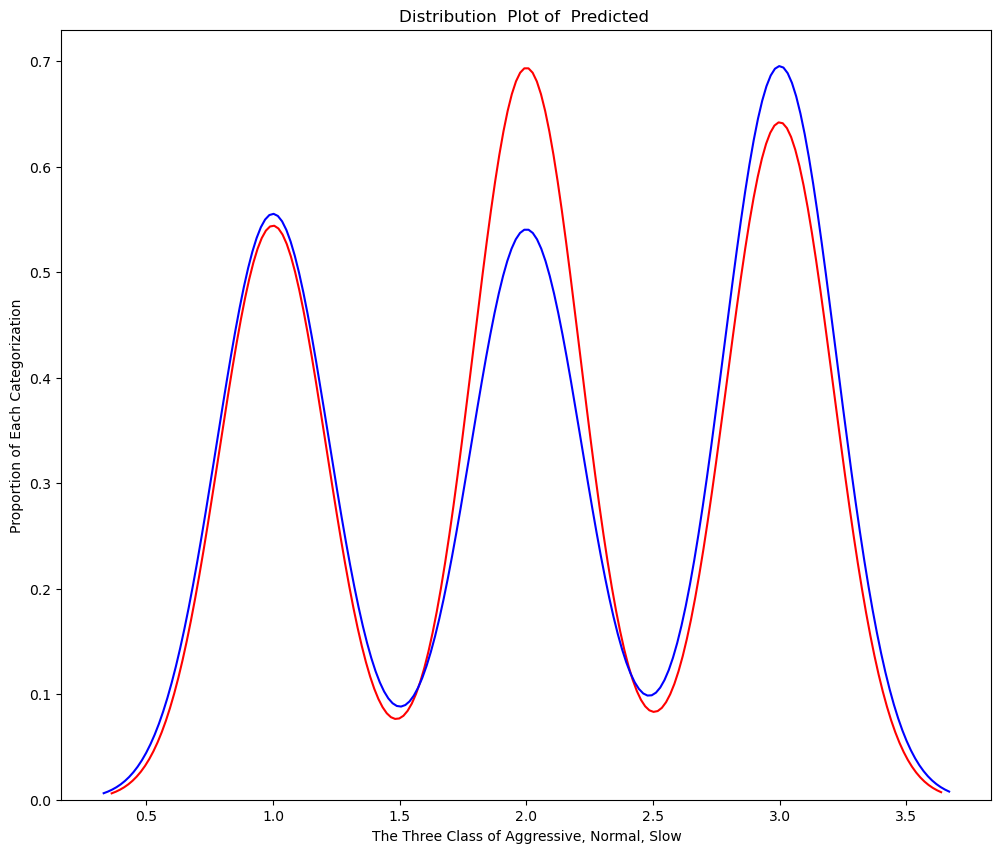

In [14]:


def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('The Three Class of Aggressive, Normal, Slow')
    plt.ylabel('Proportion of Each Categorization')

    plt.show()
    plt.close()


Title = 'Distribution  Plot of  Predicted '
DistributionPlot(y_test, y_predict, "Actual Values (Test)", "Predicted Values (Test)", Title)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


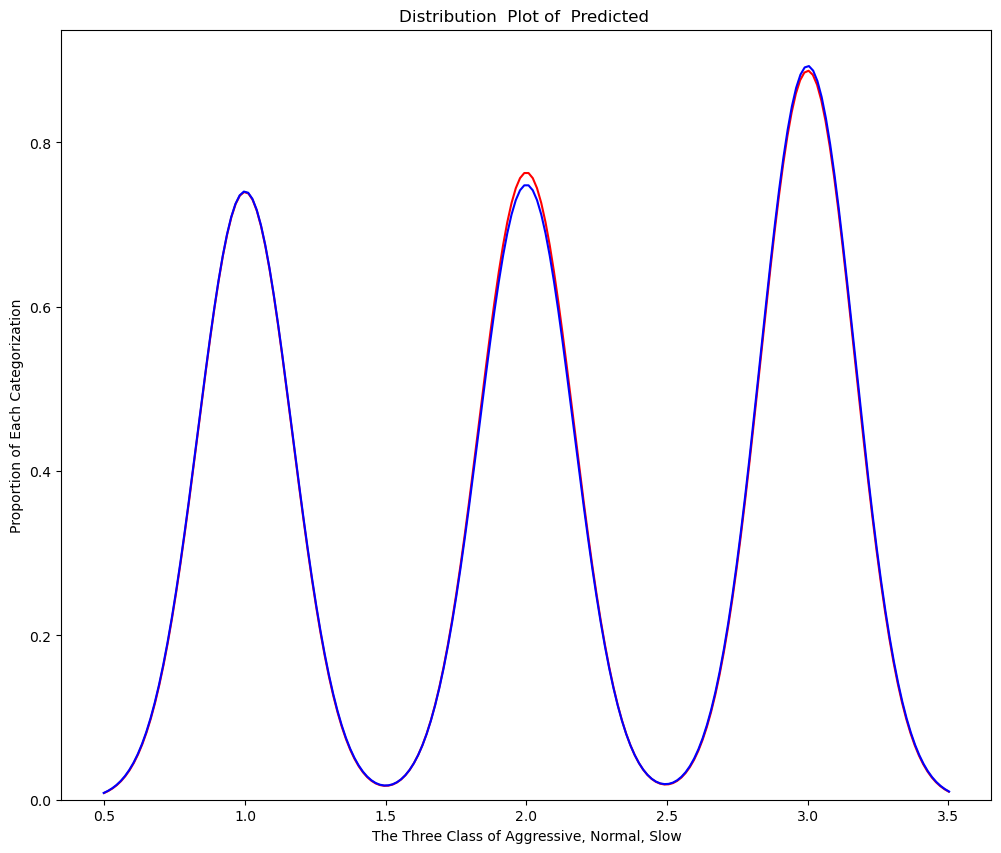

In [16]:
y_predict=ModelK.predict(x_train)

Title = 'Distribution  Plot of  Predicted '
DistributionPlot(y_train, y_predict, "Actual Values (Test)", "Predicted Values (Test)", Title)

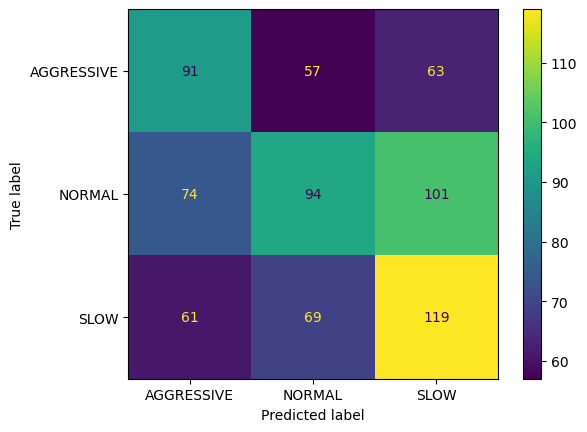

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_predict=ModelK.predict(x_test)
cm = confusion_matrix(y_test, y_predict)

classes = ['AGGRESSIVE', 'NORMAL', 'SLOW']
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels=classes)

plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [14]:

ModelR=RandomForestClassifier()
ModelR.fit(x_train,y_train)


RandomForestClassifier()

In [15]:
ModelR.score(x_test,y_test)

0.40054869684499317

In [8]:
test=pd.read_csv('test_motion_data.csv')
test.Class=test.Class.replace(['AGGRESSIVE', 'NORMAL', 'SLOW'],[1,2,3])


xtest=df_test[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
ytest=df_test.Class



ModelK.score(xtest,ytest)


0.0

In [20]:

ModelR.score(xtest,ytest)

0.8800768386388584

In [3]:
# There is some noice at the beggin and end of every time series
# It is caused because of the class switching
# ---------------------------------------------
# A solution would be to just remove the first and last N samples
df_train_slow = df_train_slow.iloc[N_RECORDS:]
df_train_slow = df_train_slow.iloc[:-N_RECORDS]

df_test_slow = df_test_slow.iloc[N_RECORDS:]
df_test_slow = df_test_slow.iloc[:-N_RECORDS]

df_train_normal = df_train_normal.iloc[N_RECORDS:]
df_train_normal = df_train_normal.iloc[:-N_RECORDS]

df_test_normal = df_test_normal.iloc[N_RECORDS:]
df_test_normal = df_test_normal.iloc[:-N_RECORDS]

df_train_aggressive = df_train_aggressive.iloc[N_RECORDS:]
df_train_aggressive = df_train_aggressive.iloc[:-N_RECORDS]

df_test_aggressive = df_test_aggressive.iloc[N_RECORDS:]
df_test_aggressive = df_test_aggressive.iloc[:-N_RECORDS]


# Check train data per label
train_slow_samples = df_train_slow.__len__()
train_normal_samples = df_train_normal.__len__()
train_aggressive_samples = df_train_aggressive.__len__()

print('---Train---')
print('Slow samples: ' + str(train_slow_samples))
print('Normal samples: ' + str(train_normal_samples))
print('Aggressive samples: ' + str(train_aggressive_samples))

df_train_slow = df_train_slow.tail(1300)
df_train_normal = df_train_normal.tail(1160)
df_train_aggressive = df_train_aggressive.tail(1080)

---Train---
Slow samples: 0
Normal samples: 0
Aggressive samples: 0


In [4]:


# Separating features from labels

# Features
X_train_normal = df_train_normal.iloc[: , :FEATURES]
X_train_slow = df_train_slow.iloc[: , :FEATURES]
X_train_aggressive = df_train_aggressive.iloc[: , :FEATURES]

X_test_normal = df_test_normal.iloc[: , :FEATURES]
X_test_slow = df_test_slow.iloc[: , :FEATURES]
X_test_aggressive = df_test_aggressive.iloc[: , :FEATURES]

# Labels
y_train_normal = df_train_normal.Class
y_train_slow = df_train_slow.Class
y_train_aggressive = df_train_aggressive.Class

y_test_normal = df_test_normal.Class
y_test_slow = df_test_slow.Class
y_test_aggressive = df_test_aggressive.Class



In [5]:

# Combine all the samples intro a train dataset
X_train = pd.concat([X_train_slow, X_train_normal, X_train_aggressive])
y_train = pd.concat([y_train_slow, y_train_normal, y_train_aggressive])

X_test = pd.concat([X_test_slow, X_test_normal, X_test_aggressive])
y_test = pd.concat([y_test_slow, y_test_normal, y_test_aggressive])

# As ML/DL algorithms are working with numbers
# the labels should be mapped to numbers
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)


# Because I'm using CategoricalCrossentropy loss function
# I have to convert my labels to one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=LABELS)
y_test = to_categorical(y_test, num_classes=LABELS)

# As the dataset contains variables that are different in scale,
# a good solution will be to standardize it
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




ValueError: y contains previously unseen labels: 'SLOW'

In [10]:


# Set a global random seed for a better random result
tf.random.set_seed(42)

# Build the model by assigning
# the number of layers and number of neurons for each layer
# the learning rate
# the number of epochs
# ------------------------------------------------------------------------
# To get these optimal parameters I will use the Keras Tuner library
# so it will get the optimal parameters for the NN
# and pass it to the model_builder function
def model_builder(hp):
    model = tf.keras.Sequential()

    model.add(Dense(hp.Int('input_unit', min_value=32, max_value=512, step=32), input_shape=(FEATURES,)))
        
    for i in range(hp.Int('n_layers', 1, 5)):
        model.add(Dense(hp.Int(f'dense_{i}_units', min_value=32, max_value=512, step=32)))

    model.add(Dropout(hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.add(Dense(LABELS, activation='softmax'))
    

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.1, 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

    return model


In [12]:


# To be able to get the optimal parameters for our network
# we have to create a Tuner with the following setup
# 'objective' -> will use to create test models
# 'max_epochs' -> the maximum number of epochs to train one model
# 'factor' -> the reduction factor for the number of epochs and number of models for each bracket
# 'directory' -> will save the training history there
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='cnn_lstm_dir',
                     project_name='driving_behavior')



Reloading Tuner from cnn_lstm_dir\driving_behavior\tuner0.json


In [8]:
# Define an event that will stop the training
# depending of the value of "val_loss"
# ------------------------------------------------------------------
# Will stop training if the "val_loss" hasn't improved in 5 epochs.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)



In [13]:
# The algorithm trains a large number of models for a few epochs and 
# carries forward only the top-performing half of models to the next round.
tuner.search(
        x=X_train,
        y=y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        callbacks=[stop_early], 
        shuffle=True
)


Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
160               |384               |input_unit
1                 |4                 |n_layers
448               |96                |dense_0_units
0.3               |0.1               |dropout_rate
0.001             |0.001             |learning_rate
384               |32                |dense_1_units
192               |32                |dense_2_units
512               |32                |dense_3_units
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\k

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "C:\Users\sirui\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\sirui\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1754, in fit
    raise ValueError(
ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.


In [55]:
# Get best hyperparameters that were found during the search
best_model = tuner.get_best_models()[0]

# Get the metrics for our trained model
eval_result = best_model.evaluate(X_test, y_test)

# Get the predictions
y_pred=best_model.predict(x=X_test)



# Transform the predicted scores array to a pretty Dataframe ^^
df_predicted = pd.DataFrame(y_pred, columns=['AGGRESSIVE', 'NORMAL', 'SLOW'])
df_predicted




import numpy as np
# Reverse the one hot encoded vector
actual_y_test = np.argmax(y_test, axis=1)
array_actual = labelEncoder.inverse_transform(actual_y_test)

# Transform the given class array to a Dataframe
df_actual = pd.DataFrame(array_actual, columns = ['Original Class'])
df_actual

# Combine the actual and resulted classes
df_result = pd.concat([df_predicted, df_actual], axis=1)
df_result




NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for cnn_lstm_dir\driving_behavior\trial_0001\checkpoint

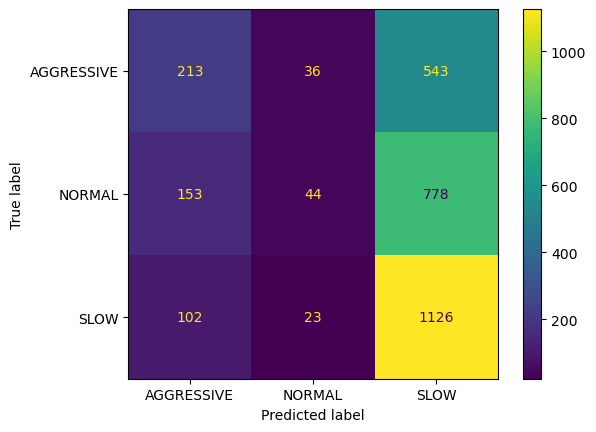

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(actual_y_test, y_pred)

classes = ['AGGRESSIVE', 'NORMAL', 'SLOW']
disp = ConfusionMatrixDisplay.from_predictions(actual_y_test, y_pred, display_labels=classes)

plt.rcParams['figure.figsize'] = [20, 10]
plt.show()
